## Simulating Cellular Automata

In [ ]:
### Code 11.5
import matplotlib
matplotlib.use('TkAgg')
from pylab import *


n = 100 # size of space: n x n
p = 0.1 # probability of initially panicky individuals

def initialize():
    global config, nextconfig
    config = zeros([n, n])
    for x in range(n):
        for y in range(n):
            config[x, y] = 1 if random() < p else 0
    nextconfig = zeros([n, n])
    
def observe():
    global config, nextconfig
    cla()
    imshow(config, vmin = 0, vmax = 1, cmap = cm.binary)

def update():
    global config, nextconfig
    for x in range(n):
        for y in range(n):
            count = 0
            for dx in [-1, 0, 1]:
                for dy in [-1, 0, 1]:
                    count += config[(x + dx) % n, (y + dy) % n]
            nextconfig[x, y] = 1 if count >= 4 else 0
    config, nextconfig = nextconfig, config
    
import pycxsimulator
pycxsimulator.GUI().start(func=[initialize, observe, update])

### Question 1

Modify Code 11.5 to implement a simulator of the Game of Life
CA. Simulate the dynamics from a random initial configuration. Measure the density of state 1’s in the configuration at each time step, and plot how the density
changes over time. This can be done by creating an empty list in the initialize
function, and then making the measurement and appending the result to the list in
the observe function. The results stored in the list can be plotted manually after the
simulation, or they could be plotted next to the visualization using pylab’s subplot
function during the simulation.

#### Conway's Game of Life Rules
- Any live cell with fewer than two live neighbors dies, as if by underpopulation.
- Any live cell with two or three live neighbors lives on to the next generation.
- Any live cell with more than three live neighbors dies, as if by overpopulation.
- Any dead cell with exactly three live neighbors becomes a live cell, as if by reproduction.

In [1]:
### Conway's Game of Life

# Set this variable to True to run an interactive simulator. This will not work on CoCalc.
interactive = False  
#comment out 'matplotlib inline' if using the GUI
%matplotlib inline 


import matplotlib
if interactive:
    matplotlib.use('TkAgg')
import numpy as np
import pylab


class GameOfLife():
    
    def __init__(self,n=100,p=0.1, interactive=False):
        '''
        Initialize new GameOfLife simulator objects with the default parameter
        settings.

        Inputs:

         * n (int) The number of cells in the cellular automaton.
           Default: 50.

         * p (float) The proportion of cells that will be active (contain
           a live cell) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.interactive = interactive
        self.n = n
        self.p = p
        self.config = np.zeros([n, n])
        self.nextconfig = np.zeros([n, n])

        #initialize empty total_density list
        self.total_density = []
        
    def initialize(self):
        self.config = np.zeros([self.n, self.n])
        self.nextconfig = np.zeros([self.n, self.n])

        #fill the current state with random 1s based on probability p
        for x in range(self.n):
            for y in range(self.n):
                self.config[x, y] = 1 if np.random.rand() < self.p else 0
                
        #initialize empty total_density list
        self.total_density = []

    def observe(self):

        
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure

        pylab.subplot(1,2,1)
        pylab.imshow(self.config, vmin = 0, vmax = 1, cmap = pylab.cm.binary)
        pylab.subplot(1,2,2)
        pylab.plot(self.total_density)
        
        if not self.interactive:
            pylab.tight_layout()
            pylab.show()

    def update(self):
        for x in range(self.n):
            for y in range(self.n):
                count = 0
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        count += self.config[(x + dx) % self.n, (y + dy) % self.n]
                if count < 3 or count > 4:
                    self.nextconfig[x, y] = 0
                else:
                    self.nextconfig[x, y] = 1
                    
                #self.nextconfig[x, y] = 1 if count >= 4 else 0
        self.config, self.nextconfig = self.nextconfig, self.config
        
        #append current density to total density
        curr_density = np.count_nonzero(self.config == 1)/(self.n*self.n)
        self.total_density.append(curr_density)



Initial state:


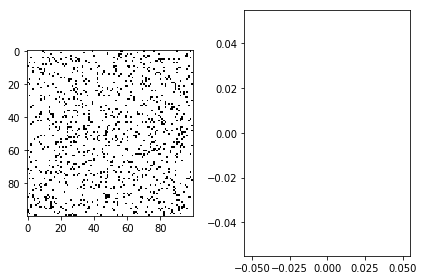

Next 5 states:


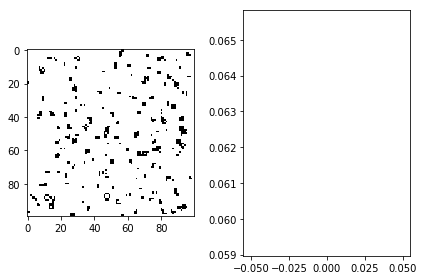

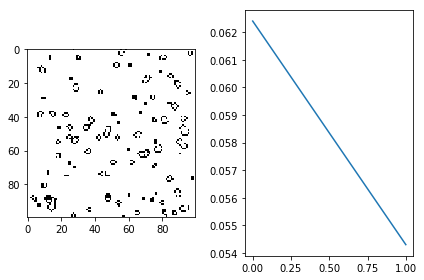

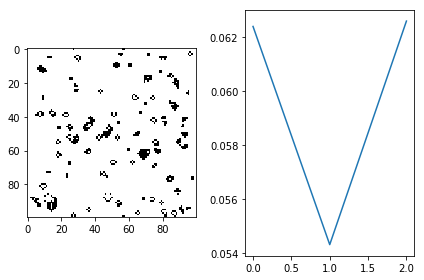

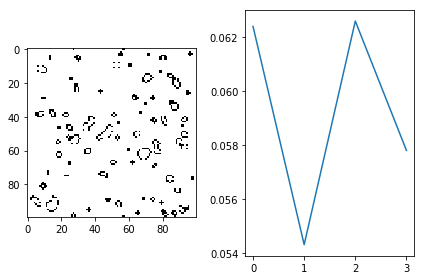

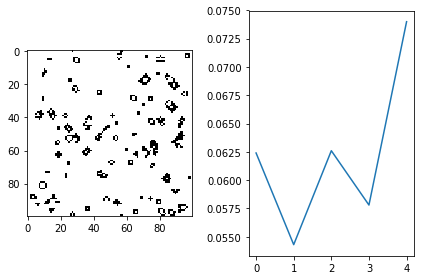


After 100 steps:


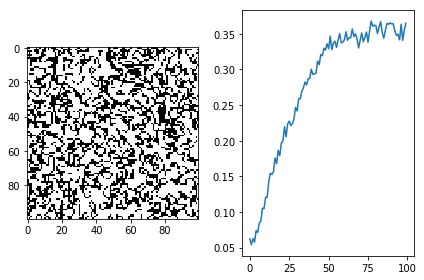

In [2]:
sim = GameOfLife(interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    pycxsimulator.GUI().start(func=[sim.initialize, sim.observe, sim.update])

else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.observe()

    print('Next 5 states:')
    for i in range(5):
        sim.update()
        sim.observe()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.update()
    sim.observe()

### Question 2

Implement an interactive parameter setter for p in Code 11.5. Then
conduct systematic simulations with varying p, and identify its critical value below
which isolated clusters are formed but above which the whole space is filled with
panic.

Experiment with initial density parameter in the Panic CA. Also answer the following
question: Around which value of the initial density parameter does the phase transition (the
whole space getting filled with panic) happen?

Answer: Around density of 0.26

Initial state:


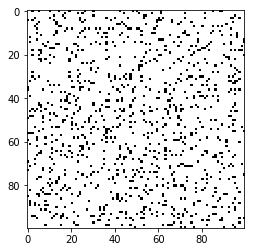

Next 5 states:


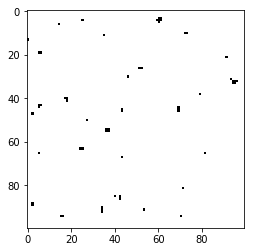

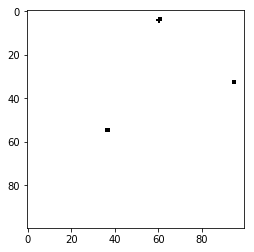

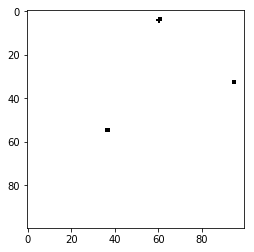

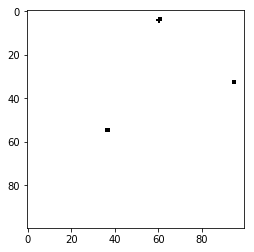

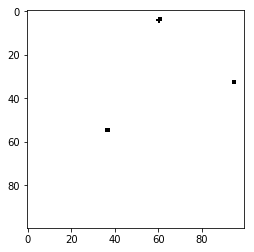


After 100 steps:


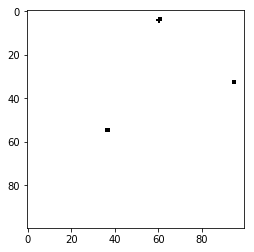

In [3]:
### Panic CA with adjustable density parameter

class Panic():
    
    def __init__(self,n=100,p=0.1,interactive=False):
        '''
        Initialize new GameOfLife simulator objects with the default parameter
        settings.

        Inputs:

         * n (int) The number of cells in the cellular automaton.
           Default: 50.

         * p (float) The proportion of cells that will be active (contain
           a live cell) when the cellular automaton is initialized. The active cells
           will be at random locations along the length of the CA. Default: 0.2.

         * interactive (bool) Whether or not we are running an interactive
           simulation. In CoCalc we have to run in non-interactive mode (False),
           but in your local Python environment you should be able to run in
           interactive mode (True). Default: False.

        '''
        self.interactive = interactive
        self.n = n
        self.p = p
        self.config = np.zeros([n, n])
        self.nextconfig = np.zeros([n, n])
        
    def initialize(self):
        self.config = np.zeros([self.n, self.n])
        self.nextconfig = np.zeros([self.n, self.n])

        #fill the current state with random 1s based on probability p
        for x in range(self.n):
            for y in range(self.n):
                self.config[x, y] = 1 if np.random.rand() < self.p else 0
                

    def observe(self):
        
        if self.interactive:
            pylab.cla()  # Clear the current figure
        else:
            pylab.figure()  # Create a new figure

        pylab.imshow(self.config, vmin = 0, vmax = 1, cmap = pylab.cm.binary)
        
        if not self.interactive:
            pylab.show()
 
    def update(self):
        for x in range(self.n):
            for y in range(self.n):
                count = 0
                for dx in [-1, 0, 1]:
                    for dy in [-1, 0, 1]:
                        count += self.config[(x + dx) % self.n, (y + dy) % self.n]
                self.nextconfig[x, y] = 1 if count >= 4 else 0
        self.config, self.nextconfig = self.nextconfig, self.config
        
    def set_density(self, value=None):

        if value is not None:
            self.p = min(1, max(0, float(value)))
        return self.p

interactive = False  # Set this variable to True to run an interactive simulator. This will not work on CoCalc.
sim = Panic(interactive=interactive)

if interactive:
    # Set up the interactive user interface.
    import pycxsimulator
    pycxsimulator.GUI(parameterSetters=[sim.set_density]).start(func=[sim.initialize, sim.observe, sim.update])
    
else:
    # Run the simulator for 100 steps and show some of the steps.
    print('Initial state:')
    sim.initialize()
    sim.observe()

    print('Next 5 states:')
    for i in range(5):
        sim.update()
        sim.observe()
        print('')

    print('After 100 steps:')
    for i in range(95):
        sim.update()
    sim.observe()

In [4]:
#testing roll method
import numpy as np
state = np.array([
[1, 2, 3, 4],
[5, 6, 7, 8],
[9, 10, 11, 12],
[13, 14, 15, 16]])
print('Initial state:')
print(state)
for dx in range(-1, 2):
    print('Shift by', dx)
    print(np.roll(state, shift=dx, axis=1))

Initial state:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Shift by -1
[[ 2  3  4  1]
 [ 6  7  8  5]
 [10 11 12  9]
 [14 15 16 13]]
Shift by 0
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
Shift by 1
[[ 4  1  2  3]
 [ 8  5  6  7]
 [12  9 10 11]
 [16 13 14 15]]
